#Week3 事前課題
## 課題１　アヤメの分析
###【問題１】データの取得

In [0]:
#フィッシャーのアヤメデータセットを読み込む

from sklearn.datasets import load_iris
iris = load_iris()


In [0]:
#説明変数をPandasのDataFrame型変数Xに格納

import pandas as pd
from pandas import Series, DataFrame

X = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [0]:
#目的変数をyに格納
import numpy as np

data = {"Species": iris.target}
y =  pd.DataFrame(data)

#displayで一覧表示できる

###【問題３】データの結合

In [0]:
#DataFrame型変数の作成

df = pd.concat([X, y], axis=1) 

In [9]:
 #【問題３】データの確認

 #先頭から４番目までのサンプル
 df.head(4)

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


In [10]:
 #ラベルごとのサンプル数の合計
 df.iloc[:][df.Species == 0]  #ilocによるデータの抽出

 df_group_sp = df.groupby('Species')  #グルーピング　　Value.countでもできる
 print(df_group_sp.size())

Species
0    50
1    50
2    50
dtype: int64


MCAR：ランダム欠損
MAR：観測データ欠損
MNAR：欠損データによる欠損

In [11]:
#特徴量に欠損値があるか確認

df.isnull().any()  #一つでも欠損がある場合はTrueを返す

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
Species         False
dtype: bool

In [12]:
#データフレームの概要で欠損値の確認
df.info()  #「150 non-null」で値が150あることがわかる

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
Species         150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


In [13]:
#統計値の表示

df.describe()

,sepal_length,sepal_width,petal_length,petal_width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


###【問題4】irisデータセット自体の調査
1. Edgar Anderson
  
   「フィッシャーのアヤメ」と呼ばれているが、元々はアメリカ人の植物学者エドガー・アンデルセン（Edgar Shannon Anderson 1897-1969)によって調査・研究されたデータが基礎となっている。故に、時々「アンデルセンのアヤメ」と呼ばれることもある。

   アンデルセンの論文「The irises of the Gaspé Peninsula」(1935）によると、実際にガスペ半島で集められたアヤメは３種類のうち２種類（iris versicolor及びiris virginica）であり、それらは全て同じ牧場、同じ日に集められ、同時に、同一人物、同一器具によって計測されたということである。



2. R.A.Fisher

  アンデルセンは英国のジョン・イネス園芸植物研究所で研究員として所属しており、フィッシャー（Ronald Aylmer Fisher 1890-1962）はその同僚であった。フィッシャーは統計学・生物学を専門としており、アンデルセンのデータセットを使用して統計に基づく分類子（classification）の手法を明らかにした。

＜参考＞

https://en.wikipedia.org/wiki/Iris_flower_data_set

https://www.jstor.org/stable/2394164?seq=1#page_scan_tab_contents

###【問題５】必要なデータを抽出

DataFrameからデータを抽出する際、**軸のラベルを使うときはloc** 、**整数のインデックス位置による参照を使うときはiloc** を使用する。

In [14]:
#Sepal_widthの抽出

df['sepal_width']  #スライス抽出
df.loc[:, ['sepal_width']]  #loc抽出
display(df.iloc[:, [1]].head())  #iloc抽出


,sepal_width
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6


In [30]:
# 50 ~ 90番目のデータ抽出

df.loc[49:98].head()

#df.ix[ ]も使うことができるが、推奨されていない

,sepal_length,sepal_width,petal_length,petal_width,Species
49,5.0,3.3,1.4,0.2,0
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1


In [31]:
#petal_lengthの列の50番目から99番目までのデータを抽出する

df.iloc[49:98, [2]].head()

#df.ix[49:98, [2]].head() も使うことができるが、推奨されていない

,petal_length
49,1.4
50,4.7
51,4.5
52,4.9
53,4.0


In [18]:
#petal_widthの値が0.2のデータを抽出する

#df.iloc[:][df.petal_width == 0.2]
df.query("petal_width == 0.2")

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


#### 【補足】行列の抽出について

 - loc、ilocの両義的なメソッドとして「ix」が使用できるが、非推奨である。
 - loc、ilocの単一指定バージョンとして「at」「iat」メソッドが存在する。ピンポイントで抜き出したいときに便利。
 - queryは行列の同時指定はできない（みたい）。あくまで行単位、列単位で条件を指定する。
 - 複数要素を指定したいときは「isin( {list} )」を使用する

###【問題６】図の作成

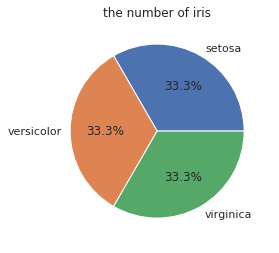

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()  #Seabornの書式化

"""
円グラフの作成
"""
p = np.array(df_group_sp.size())  #グループ情報を配列として取得

plt.title("the number of iris")
plt.pie(p, labels=["setosa", "versicolor", "virginica"], autopct="%.1f%%")
plt.show()



#### 箱ひげ図とバイオリン図

- 箱ひげ図
  - 【メリット】データの四分位点、中央値、最大値、最小値を記載するのでデータの分布が一覧できる
  - 【デメリット】箱が四分位点で終わってしまっているため、詳細な分布が分かりにくい

- バイオリン図
 - 【メリット】データのおおよその分布が分かる。データ分布がmultimodal（複数のピークがある）場合に特に有用。
 - 【デメリット】認知度が低い

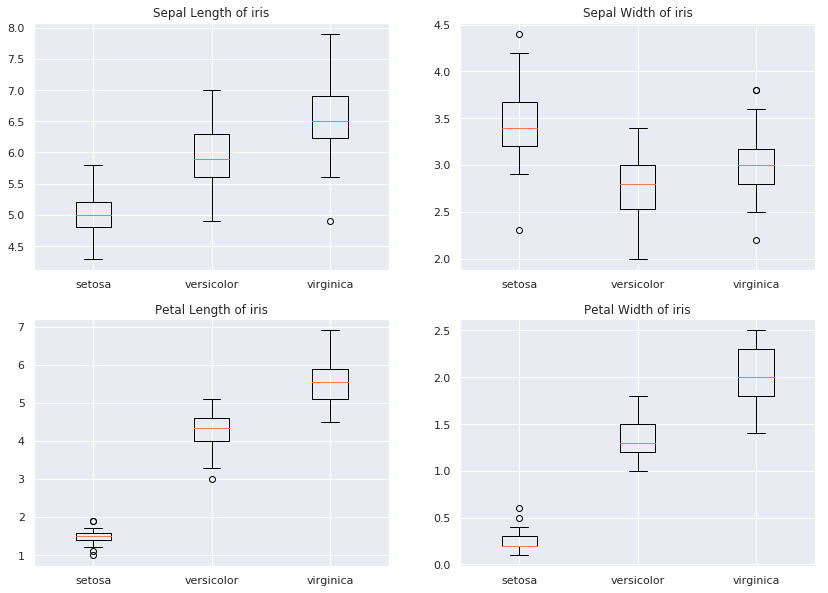

In [33]:
"""
箱ひげ図の作成
"""
plt.figure(figsize=(14,10))

#sepal_length
sl_0 = list(df.sepal_length.iloc[:][df.Species == 0])
sl_1 = list(df.sepal_length.iloc[:][df.Species == 1])
sl_2 = list(df.sepal_length.iloc[:][df.Species == 2])
features1 = (sl_0, sl_1, sl_2)

ax = plt.subplot(2,2,1)
bp = ax.boxplot(features1)
ax.set_xticklabels(["setosa", "versicolor", "virginica"])
plt.title('Sepal Length of iris')


#sepal_width
sw_0 = list(df.sepal_width.iloc[:][df.Species == 0])
sw_1 = list(df.sepal_width.iloc[:][df.Species == 1])
sw_2 = list(df.sepal_width.iloc[:][df.Species == 2])
features2 = (sw_0, sw_1, sw_2)

ax = plt.subplot(2,2,2)
bp = ax.boxplot(features2)
ax.set_xticklabels(["setosa", "versicolor", "virginica"])
plt.title('Sepal Width of iris')


#petal_length
pl_0 = list(df.petal_length.iloc[:][df.Species == 0])
pl_1 = list(df.petal_length.iloc[:][df.Species == 1])
pl_2 = list(df.petal_length.iloc[:][df.Species == 2])
features3 = (pl_0, pl_1, pl_2)

ax = plt.subplot(2,2,3)
bp = ax.boxplot(features3)
ax.set_xticklabels(["setosa", "versicolor", "virginica"])
plt.title('Petal Length of iris')


#petal_width
pw_0 = list(df.petal_width.iloc[:][df.Species == 0])
pw_1 = list(df.petal_width.iloc[:][df.Species == 1])
pw_2 = list(df.petal_width.iloc[:][df.Species == 2])
features4 = (pw_0, pw_1, pw_2)

ax = plt.subplot(2,2,4)
bp = ax.boxplot(features4)
ax.set_xticklabels(["setosa", "versicolor", "virginica"])
plt.title('Petal Width of iris')

plt.show()

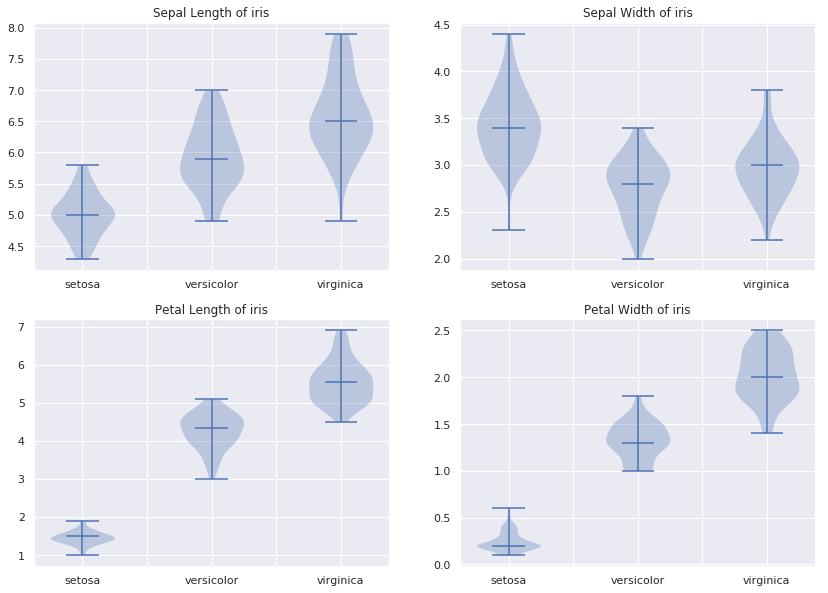

In [34]:
"""
バイオリン図の作成
"""
plt.figure(figsize=(14,10))

#sepal_length
ax = plt.subplot(2,2,1)
bp = ax.violinplot(features1, showmedians=True)
ax.set_xticklabels(["", "setosa", "", "versicolor", "", "virginica"])
plt.title('Sepal Length of iris')


#sepal_width
ax = plt.subplot(2,2,2)
bp = ax.violinplot(features2, showmedians=True)
ax.set_xticklabels(["", "setosa", "", "versicolor", "", "virginica"])
plt.title('Sepal Width of iris')


#petal_length
ax = plt.subplot(2,2,3)
bp = ax.violinplot(features3, showmedians=True)
ax.set_xticklabels(["", "setosa", "", "versicolor", "", "virginica"])
plt.title('Petal Length of iris')


#petal_width
ax = plt.subplot(2,2,4)
bp = ax.violinplot(features4, showmedians=True)
ax.set_xticklabels(["", "setosa", "", "versicolor", "", "virginica"])
plt.title('Petal Width of iris')

plt.show()

### 【問題7】特徴量間の関係の確認

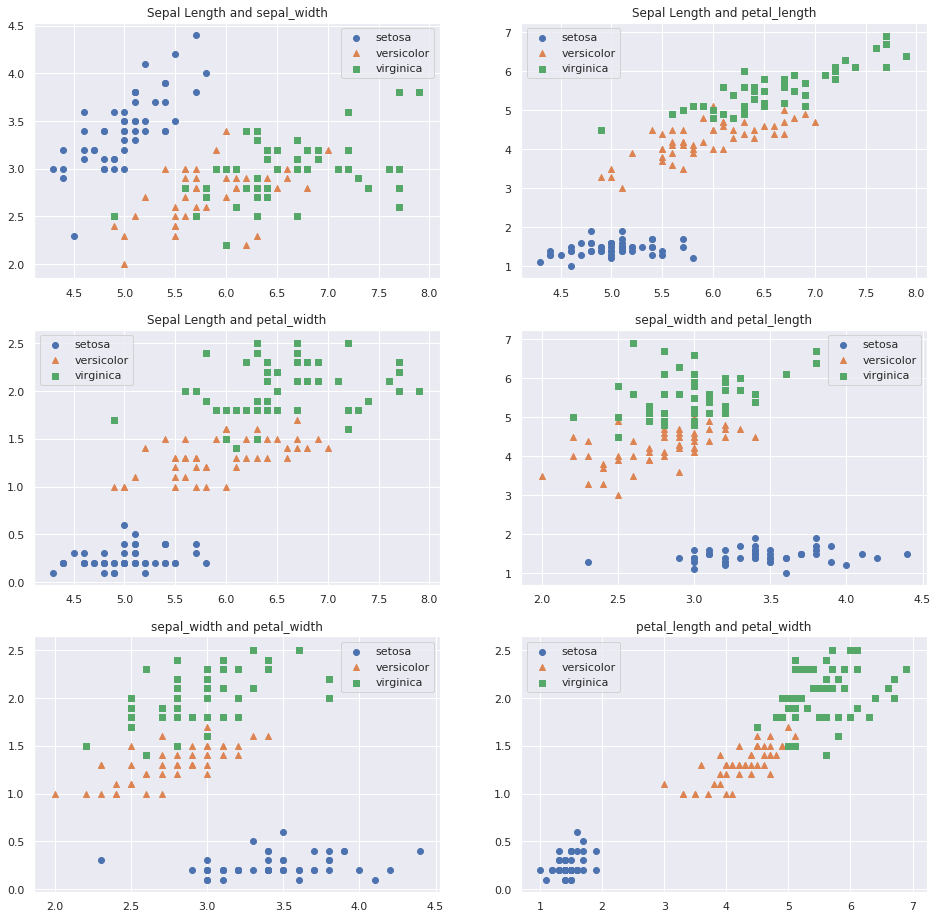

In [47]:
# 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る

plt.figure(figsize=(16,16))

ax = plt.subplot(3,2,1)
ax.scatter(df[df["Species"]==0]["sepal_length"], df[df["Species"]==0]["sepal_width"], marker="o", label="setosa")
ax.scatter(df[df["Species"]==1]["sepal_length"], df[df["Species"]==1]["sepal_width"], marker="^", label="versicolor")
ax.scatter(df[df["Species"]==2]["sepal_length"], df[df["Species"]==2]["sepal_width"], marker=",", label="virginica")
ax.set_title('Sepal Length and sepal_width')
ax.legend()

ax = plt.subplot(3,2,2)
ax.scatter(df[df["Species"]==0]["sepal_length"], df[df["Species"]==0]["petal_length"], marker="o", label="setosa")
ax.scatter(df[df["Species"]==1]["sepal_length"], df[df["Species"]==1]["petal_length"], marker="^", label="versicolor")
ax.scatter(df[df["Species"]==2]["sepal_length"], df[df["Species"]==2]["petal_length"], marker=",", label="virginica")
ax.set_title('Sepal Length and petal_length')
ax.legend()

ax = plt.subplot(3,2,3)
ax.scatter(df[df["Species"]==0]["sepal_length"], df[df["Species"]==0]["petal_width"], marker="o", label="setosa")
ax.scatter(df[df["Species"]==1]["sepal_length"], df[df["Species"]==1]["petal_width"], marker="^", label="versicolor")
ax.scatter(df[df["Species"]==2]["sepal_length"], df[df["Species"]==2]["petal_width"], marker=",", label="virginica")
ax.set_title('Sepal Length and petal_width')
ax.legend()

ax = plt.subplot(3,2,4)
ax.scatter(df[df["Species"]==0]["sepal_width"], df[df["Species"]==0]["petal_length"], marker="o", label="setosa")
ax.scatter(df[df["Species"]==1]["sepal_width"], df[df["Species"]==1]["petal_length"], marker="^", label="versicolor")
ax.scatter(df[df["Species"]==2]["sepal_width"], df[df["Species"]==2]["petal_length"], marker=",", label="virginica")
ax.set_title('sepal_width and petal_length')
ax.legend()

ax = plt.subplot(3,2,5)
ax.scatter(df[df["Species"]==0]["sepal_width"], df[df["Species"]==0]["petal_width"], marker="o", label="setosa")
ax.scatter(df[df["Species"]==1]["sepal_width"], df[df["Species"]==1]["petal_width"], marker="^", label="versicolor")
ax.scatter(df[df["Species"]==2]["sepal_width"], df[df["Species"]==2]["petal_width"], marker=",", label="virginica")
ax.set_title('sepal_width and petal_width')
ax.legend()

ax = plt.subplot(3,2,6)
ax.scatter(df[df["Species"]==0]["petal_length"], df[df["Species"]==0]["petal_width"], marker="o", label="setosa")
ax.scatter(df[df["Species"]==1]["petal_length"], df[df["Species"]==1]["petal_width"], marker="^", label="versicolor")
ax.scatter(df[df["Species"]==2]["petal_length"], df[df["Species"]==2]["petal_width"], marker=",", label="virginica")
ax.set_title('petal_length and petal_width')
ax.legend()

plt.show()


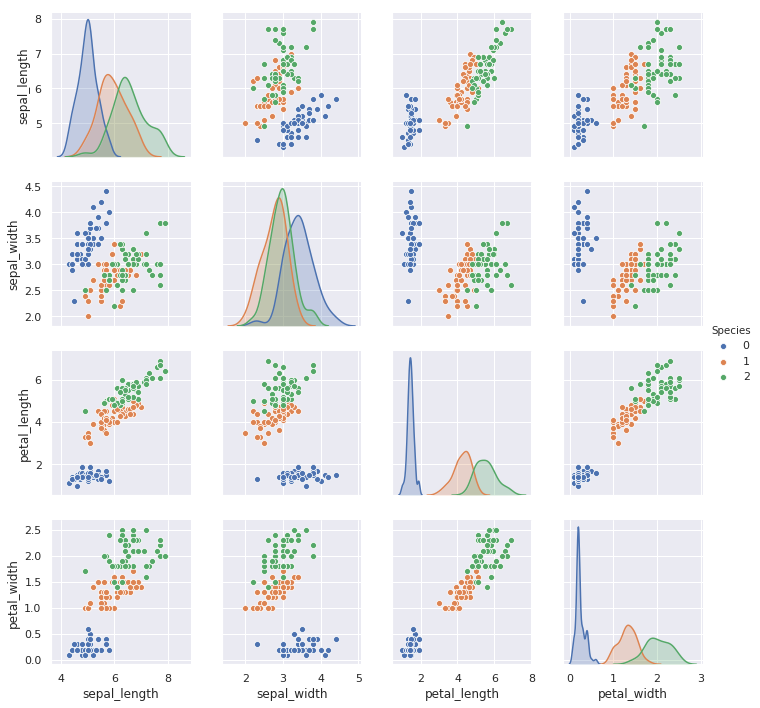

In [48]:
sns.pairplot(df, hue='Species',
             vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [49]:
#特徴量に関する相関係数行列

X.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


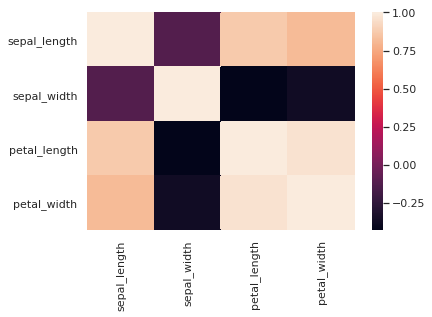

In [0]:
#相関係数行列のヒートマップ

sns.heatmap(X.corr())

### 【問題8】可視化したグラフや表の結果の説明

 - 箱ひげ図やバイオリンプロットから、目的変数の０（以下、Setosa）に関しては、花弁の大きさが長さ幅の両面において他の２種類の目的変数より小さい。
 - 散布図行列から、Setosaは相関において概ね独自のグループを形成している。
 - 目的変数１（viersicolor）と目的変数２（verginica）は多くの組み合わせで散布図が重なっているが、花弁の幅にに関して差異が比較的大きい。
 - 相関係数行列から、花弁の長さと幅が最も相関の高い組み合わせであり、萼片の幅と花弁の長さが最も相関の低い組み合わせである。